<a href="https://colab.research.google.com/github/MithunKiniStar/AutoEncodersFaceSketch/blob/main/1_Deep_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image opencv-python imutils

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, Conv2DTranspose, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re 
import keras
from keras import layers
from keras import regularizers
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '/content/photos'
img_array = []

sketch_path = '/content/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    print("Image is ",image)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

In [ ]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Total number of sketch images: 1504
Total number of images: 1504
Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


**Model for Photo To Sketch**

In [ ]:
from keras import layers
input_img = keras.Input(shape=(256, 256, 3))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(3, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 dense_6 (Dense)             (None, 256, 256, 128)     512       
                                                                 
 dense_7 (Dense)             (None, 256, 256, 64)      8256      
                                                                 
 dense_8 (Dense)             (None, 256, 256, 32)      2080      
                                                                 
 dense_9 (Dense)             (None, 256, 256, 64)      2112      
                                                                 
 dense_10 (Dense)            (None, 256, 256, 128)     8320      
                                                                 
 dense_11 (Dense)            (None, 256, 256, 3)       387 

Epoch 1/15
44/44 [==============================] - 16s 308ms/step - loss: 0.2482 - acc: 0.0816 - val_loss: 0.1491 - val_acc: 0.0014
Epoch 2/15
44/44 [==============================] - 13s 297ms/step - loss: 0.1356 - acc: 0.3821 - val_loss: 0.1134 - val_acc: 8.3454e-04
Epoch 3/15
44/44 [==============================] - 13s 297ms/step - loss: 0.1011 - acc: 0.5126 - val_loss: 0.0884 - val_acc: 0.9979
Epoch 4/15
44/44 [==============================] - 13s 300ms/step - loss: 0.0892 - acc: 0.4754 - val_loss: 0.0857 - val_acc: 0.6001
Epoch 5/15
44/44 [==============================] - 13s 297ms/step - loss: 0.0862 - acc: 0.4479 - val_loss: 0.0838 - val_acc: 0.4397
Epoch 6/15
44/44 [==============================] - 13s 298ms/step - loss: 0.0845 - acc: 0.3542 - val_loss: 0.0835 - val_acc: 0.4639
Epoch 7/15
44/44 [==============================] - 13s 298ms/step - loss: 0.0829 - acc: 0.3573 - val_loss: 0.0818 - val_acc: 0.4114
Epoch 8/15
44/44 [==============================] - 13s 298ms/ste

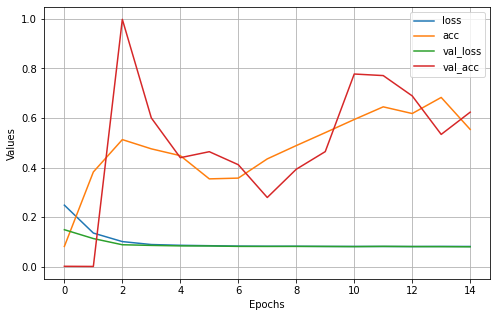

In [ ]:
hist = autoencoder.fit(train_image, train_sketch_image,
                epochs=15,
                shuffle=True,
                validation_data=(test_image, test_sketch_image))


# plt.plot(hist.history["loss"]);
# plt.xlabel('Epochs');
# plt.ylabel('Training Error');
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs');
plt.ylabel('Values');
plt.show()

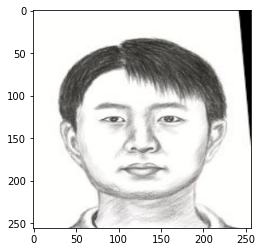

In [ ]:

plt.imshow(test_sketch_image[0].reshape(256, 256, 3))

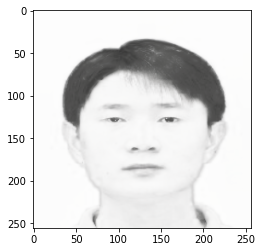

In [ ]:
decoded_imgs = autoencoder.predict(test_image)
plt.imshow(decoded_imgs[0].reshape(256, 256, 3))

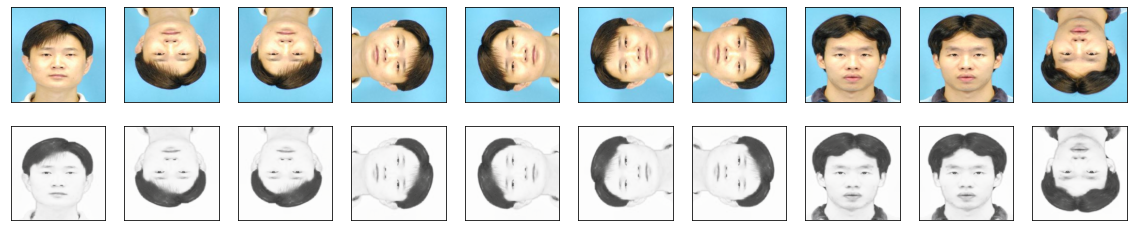

In [ ]:
decoded_imgs = autoencoder.predict(test_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Evaluating image via Structural similarity index (SSIM) before regularisation**

In [ ]:
decoded_imgs = autoencoder.predict(test_image)
decoded_imgs = decoded_imgs[0].reshape(256, 256, 3)
print("SSIM value is ",ssim(test_sketch_image[0].reshape(256, 256, 3), decoded_imgs, multichannel = True))

SSIM value is  0.7701333396339863


**Evaluating image via Mean Squared Error (MSE) before regularisation**

In [ ]:
mse = mean_squared_error(test_sketch_image[0].reshape(256, 256, 3), decoded_imgs)
print("MSE value is ",mse)

MSE value is  0.09767730183058058


**Adding Regulariser to avoid overfitting**

In [ ]:
from keras import layers
input_img = keras.Input(shape=(256, 256, 3))
encoded = layers.Dense(128, activation='relu',activity_regularizer=regularizers.l2(10e-5))(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded_reg = layers.Dense(64, activation='relu')(encoded)
decoded_reg = layers.Dense(128, activation='relu')(decoded_reg)
decoded_reg = layers.Dense(3, activation='sigmoid')(decoded_reg)

autoencoder_reg = keras.Model(input_img, decoded_reg)
autoencoder_reg.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

Epoch 1/15
44/44 [==============================] - 16s 344ms/step - loss: 4.7360 - acc: 0.9476 - val_loss: 2.1201 - val_acc: 0.9983
Epoch 2/15
44/44 [==============================] - 15s 334ms/step - loss: 1.0706 - acc: 0.4095 - val_loss: 0.5683 - val_acc: 0.9856
Epoch 3/15
44/44 [==============================] - 15s 335ms/step - loss: 0.3351 - acc: 0.7915 - val_loss: 0.2174 - val_acc: 0.2249
Epoch 4/15
44/44 [==============================] - 15s 334ms/step - loss: 0.1630 - acc: 0.2168 - val_loss: 0.1286 - val_acc: 0.6961
Epoch 5/15
44/44 [==============================] - 15s 336ms/step - loss: 0.1188 - acc: 0.7800 - val_loss: 0.1059 - val_acc: 0.8364
Epoch 6/15
44/44 [==============================] - 15s 335ms/step - loss: 0.1066 - acc: 0.8015 - val_loss: 0.1003 - val_acc: 0.7146
Epoch 7/15
44/44 [==============================] - 15s 335ms/step - loss: 0.1009 - acc: 0.6867 - val_loss: 0.0952 - val_acc: 0.8249
Epoch 8/15
44/44 [==============================] - 15s 335ms/step - 

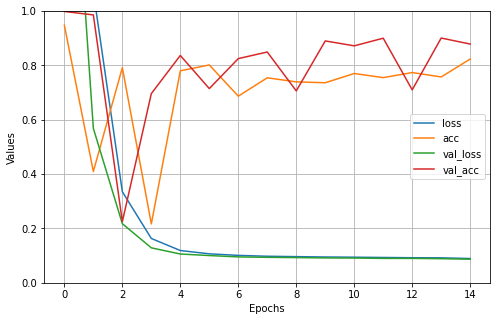

In [ ]:
hist = autoencoder_reg.fit(train_image, train_sketch_image,
                epochs=15,
                shuffle=True,
                validation_data=(test_image, test_sketch_image))


# plt.plot(hist.history["loss"]);
# plt.xlabel('Epochs');
# plt.ylabel('Training Error');
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.xlabel('Epochs');
plt.ylabel('Values');
plt.show()

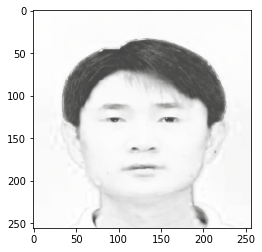

In [ ]:
decoded_imgs_reg = autoencoder_reg.predict(test_image)
plt.imshow(decoded_imgs_reg[0].reshape(256, 256, 3))

**Evaluating image via Structural similarity index (SSIM) after regularisation**

In [ ]:
decoded_imgs = autoencoder_reg.predict(test_image)
decoded_imgs = decoded_imgs[0].reshape(256, 256, 3)
print("SSIM value is ",ssim(test_sketch_image[0].reshape(256, 256, 3), decoded_imgs, multichannel = True))

SSIM value is  0.7576972779756707


**Evaluating image via Mean Squared Error (MSE) after regularisation**

In [ ]:
mse = mean_squared_error(test_image[0].reshape(256, 256, 3), decoded_imgs)
print("MSE value is ",mse)

MSE value is  0.07449007114415436


**Model for Sketch to Photos after regularisation**

Epoch 1/5
44/44 [==============================] - 15s 337ms/step - loss: 0.1467 - acc: 0.6641 - val_loss: 0.1317 - val_acc: 0.6970
Epoch 2/5
44/44 [==============================] - 15s 335ms/step - loss: 0.1465 - acc: 0.6635 - val_loss: 0.1328 - val_acc: 0.6865
Epoch 3/5
44/44 [==============================] - 15s 335ms/step - loss: 0.1471 - acc: 0.6624 - val_loss: 0.1317 - val_acc: 0.6942
Epoch 4/5
44/44 [==============================] - 15s 336ms/step - loss: 0.1470 - acc: 0.6639 - val_loss: 0.1337 - val_acc: 0.7011
Epoch 5/5
44/44 [==============================] - 15s 334ms/step - loss: 0.1472 - acc: 0.6646 - val_loss: 0.1317 - val_acc: 0.6890


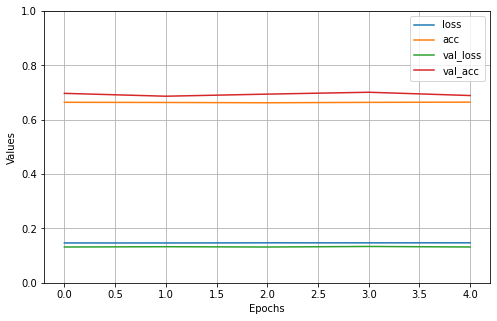

In [ ]:
hist = autoencoder_reg.fit( train_sketch_image, train_image,
                epochs=5,
                shuffle=True,
                validation_data=( test_sketch_image, test_image))


# pd.DataFrame(hist.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1) 
# plt.show()
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.xlabel('Epochs');
plt.ylabel('Values');
plt.show()

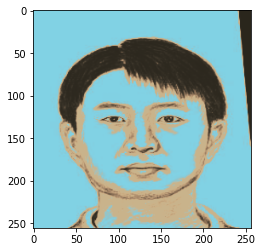

In [ ]:
decoded_imgs = autoencoder_reg.predict(test_sketch_image)
plt.imshow(decoded_imgs[0].reshape(256, 256, 3))

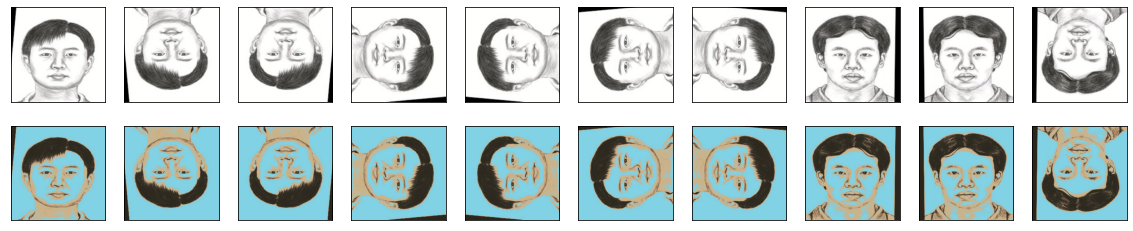

In [ ]:
# Display for sketch to photos
decoded_imgs = autoencoder_reg.predict(test_sketch_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_sketch_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Evaluating image via Structural similarity index (SSIM) after regularisation**

In [ ]:
decoded_imgs = autoencoder_reg.predict(test_image)
decoded_imgs = decoded_imgs[0].reshape(256, 256, 3)
print("SSIM value is ",ssim(test_image[0].reshape(256, 256, 3), decoded_imgs, multichannel = True))

SSIM value is  0.690549353617461


**Evaluating image via Mean Squared Error (MSE) after regularisation**

In [ ]:
mse = mean_squared_error(test_image[0].reshape(256, 256, 3), decoded_imgs)
print("MSE value is ",mse)

MSE value is  0.06623316615832324


**Hyperparameter Tuning**

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 3.3 MB/s 


In [ ]:
# from keras import layers
# input_img = keras.Input(shape=(256, 256, 3))
# encoded = layers.Dense(128, activation='relu')(input_img)
# encoded = layers.Dense(64, activation='relu')(encoded)
# encoded = layers.Dense(32, activation='relu')(encoded)

# decoded = layers.Dense(64, activation='relu')(encoded)
# decoded = layers.Dense(128, activation='relu')(decoded)
# decoded = layers.Dense(3, activation='sigmoid')(decoded)

In [ ]:
def build_model(hp):
  input_img = keras.Input(shape=(256, 256, 3))
  encoded = layers.Dense(units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),
        activation='relu')(input_img)
  
  encoded = layers.Dense(units=hp.Int('dense_2_units', min_value=16, max_value=64, step=16),
        activation='relu')(encoded)
  
  encoded = layers.Dense(units=hp.Int('dense_3_units', min_value=16, max_value=32, step=16),
        activation='relu')(encoded)

  decoded = layers.Dense(units=hp.Int('dense_4_units', min_value=16, max_value=64, step=16),
        activation='relu')(encoded)

  decoded = layers.Dense(units=hp.Int('dense_5_units', min_value=16, max_value=128, step=16),
        activation='relu')(encoded)

  decoded = layers.Dense(3, activation='sigmoid')(decoded)

  autoencoder = keras.Model(input_img, decoded)
  #autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  autoencoder.compile(optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])), loss = hp.Choice("loss",['mean_absolute_error','sparse_categorical_crossentropy','binary_crossentropy','mean_squared_error']),
              metrics = ['acc'])
  
  return autoencoder
  


In [ ]:
# def build_model(hp):  
#   model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(28,28,1)
#     ),
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(10, activation='softmax')
#   ])
  
#   model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
  
#   return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_acc',
                          max_trials=3,directory='/content/output8',project_name="FaceToSketch")

In [ ]:
tuner_search.search(train_sketch_image,train_image,epochs=100,validation_split=0.1, validation_data=(test_sketch_image, test_image))

Trial 3 Complete [00h 13m 23s]
val_acc: 0.6949397325515747

Best val_acc So Far: 0.6960274577140808
Total elapsed time: 00h 41m 11s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 dense (Dense)               (None, 256, 256, 112)     448       
                                                                 
 dense_1 (Dense)             (None, 256, 256, 64)      7232      
                                                                 
 dense_2 (Dense)             (None, 256, 256, 16)      1040      
                                                                 
 dense_4 (Dense)             (None, 256, 256, 32)      544       
                                                                 
 dense_5 (Dense)             (None, 256, 256, 3)       99        
                                                                 
Total params: 9,363
Trainable params: 9,363
Non-trainable par

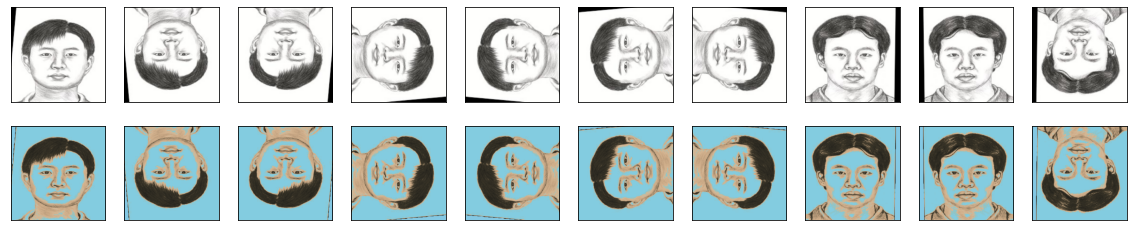

In [ ]:
decoded_imgs = model.predict(test_sketch_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_sketch_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoded_imgs = model.predict(test_image)
decoded_imgs = decoded_imgs[0].reshape(256, 256, 3)
print("SSIM value is ",ssim(test_image[0].reshape(256, 256, 3), decoded_imgs, multichannel = True))

SSIM value is  0.8833607750142417


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/photos',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode= 'binary')

test_set = test_datagen.flow_from_directory('sketches',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode= 'binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
